# Mongabay Fire Tool

In this notebook we will perform all the data processing required for the [Fire tool](https://docs.google.com/document/d/1zpwxTejaSbb7tq3uFnwVx_fzysTMBZJvnJEhuDW4vAE/edit#).

For the fire alerts we will use the VIIRS alerts coming from GFW. 
[Here](https://www.globalforestwatch.org/dashboards/country/BRA/?category=fires&dashboardPrompts=eyJzaG93UHJvbXB0cyI6dHJ1ZSwicHJvbXB0c1ZpZXdlZCI6WyJkb3dubG9hZERhc2hib2FyZFN0YXRzIiwiZGFzaGJvYXJkQW5hbHlzZXMiLCJ3aWRnZXRTZXR0aW5ncyIsInNoYXJlV2lkZ2V0Il0sInNldHRpbmdzIjp7InNob3dQcm9tcHRzIjp0cnVlLCJwcm9tcHRzVmlld2VkIjpbImRvd25sb2FkRGFzaGJvYXJkU3RhdHMiLCJkYXNoYm9hcmRBbmFseXNlcyIsIndpZGdldFNldHRpbmdzIl0sInNldHRpbmdzIjp7InNob3dQcm9tcHRzIjp0cnVlLCJwcm9tcHRzVmlld2VkIjpbImRvd25sb2FkRGFzaGJvYXJkU3RhdHMiLCJkYXNoYm9hcmRBbmFseXNlcyIsIndpZGdldFNldHRpbmdzIl0sInNldHRpbmdzIjp7InNob3dQcm9tcHRzIjp0cnVlLCJwcm9tcHRzVmlld2VkIjpbImRvd25sb2FkRGFzaGJvYXJkU3RhdHMiLCJkYXNoYm9hcmRBbmFseXNlcyJdLCJzZXR0aW5ncyI6eyJzaG93UHJvbXB0cyI6dHJ1ZSwicHJvbXB0c1ZpZXdlZCI6W10sInNldHRpbmdzIjp7Im9wZW4iOmZhbHNlLCJzdGVwSW5kZXgiOjAsInN0ZXBzS2V5IjoiIn0sIm9wZW4iOnRydWUsInN0ZXBzS2V5IjoiZG93bmxvYWREYXNoYm9hcmRTdGF0cyJ9LCJvcGVuIjp0cnVlLCJzdGVwSW5kZXgiOjAsInN0ZXBzS2V5Ijoid2lkZ2V0U2V0dGluZ3MifSwic3RlcHNLZXkiOiJ3aWRnZXRTZXR0aW5ncyIsInN0ZXBJbmRleCI6LTEsImZvcmNlIjp0cnVlfSwib3BlbiI6dHJ1ZSwic3RlcEluZGV4IjowLCJzdGVwc0tleSI6InNoYXJlV2lkZ2V0In0sInN0ZXBzS2V5Ijoic2hhcmVXaWRnZXQiLCJmb3JjZSI6dHJ1ZX0%3D&fireAlertStats=eyJzdGFydEluZGV4IjowLCJlbmRJbmRleCI6NTEsInN0YXJ0RGF0ZUFic29sdXRlIjoiMjAyMC0xMS0zMCIsImVuZERhdGVBYnNvbHV0ZSI6IjIwMjEtMTEtMjIifQ%3D%3D&location=WyJjb3VudHJ5IiwiQlJBIl0%3D&map=eyJjZW50ZXIiOnsibGF0IjotMTUuMTI4MzAwNzgxNjIwNzUsImxuZyI6LTU0LjM5MDU3OTIxOTk5MjgxfSwiem9vbSI6My40OTg0NTEzMzAyNjUwNDUsImNhbkJvdW5kIjpmYWxzZSwiZGF0YXNldHMiOlt7ImRhdGFzZXQiOiJwb2xpdGljYWwtYm91bmRhcmllcyIsImxheWVycyI6WyJkaXNwdXRlZC1wb2xpdGljYWwtYm91bmRhcmllcyIsInBvbGl0aWNhbC1ib3VuZGFyaWVzIl0sImJvdW5kYXJ5Ijp0cnVlLCJvcGFjaXR5IjoxLCJ2aXNpYmlsaXR5Ijp0cnVlfSx7ImRhdGFzZXQiOiJmaXJlLWFsZXJ0cy12aWlycyIsImxheWVycyI6WyJmaXJlLWFsZXJ0cy12aWlycyJdLCJvcGFjaXR5IjoxLCJ2aXNpYmlsaXR5Ijp0cnVlLCJ0aW1lbGluZVBhcmFtcyI6eyJzdGFydERhdGVBYnNvbHV0ZSI6IjIwMjEtMDgtMjQiLCJlbmREYXRlQWJzb2x1dGUiOiIyMDIxLTExLTIyIiwic3RhcnREYXRlIjoiMjAyMS0wOC0yNCIsImVuZERhdGUiOiIyMDIxLTExLTIyIiwidHJpbUVuZERhdGUiOiIyMDIxLTExLTIyIn19XX0%3D&scrollTo=fireAlertStats&showMap=false&widget=fireAlertStats) an example of a chart with that data.

And here the endpoin to retrieve the data with a query example:

```
https://data-api.globalforestwatch.org/dataset/gadm__viirs__iso_weekly_alerts/v202105/query/json?sql=SELECT iso, alert__year, alert__week, SUM(alert__count) AS alert__count, confidence__cat FROM data WHERE iso = 'BRA' AND confidence__cat = 'h' and alert__year = 2021 GROUP BY iso, alert__year, alert__week, confidence__cat

```

For the precipitation data we will use the [CHIRPS Daily dataset from  GEE](https://developers.google.com/earth-engine/datasets/catalog/UCSB-CHG_CHIRPS_DAILY#description). Notice that this dataset doesn’t cover the whole world.


The chart will include the following elements:
- moving average of weekly precipitation.
- long-term average of weekly precipitation.
- Cumulative fire alerts
- long-term average of cumulative fire alerts.

The scope of the geographical data should be national (iso) or regional (adm1). 


# Setup
## Library import
We import all the required Python libraries

In [1]:
import os
import ee
import wxee
import geemap
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
import xarray_leaflet
import ipyleaflet as ipyl
import json
import requests
import math

ee.Initialize()

# Data import
## [CHIRPS Daily dataset from  GEE](https://developers.google.com/earth-engine/datasets/catalog/UCSB-CHG_CHIRPS_DAILY#description)
**Automated conversion from Earth Engine JavaScripts to Python scripts**

In [27]:
js_dir = '/home/iker/Vizzuality/Proiektuak/sci_team_data_bank/Projects/mongabay/processing'
geemap.conversion.js_to_python_dir(in_dir=js_dir, out_dir=js_dir, use_qgis=True)
print("Python scripts saved at: {}".format(js_dir))

Converting Earth Engine JavaScripts to Python scripts...

Processing 1/2: /home/iker/Vizzuality/Proiektuak/sci_team_data_bank/Projects/mongabay/processing/create_grid.js
Processing 2/2: /home/iker/Vizzuality/Proiektuak/sci_team_data_bank/Projects/mongabay/processing/Precipitation.js
Python scripts saved at: /home/iker/Vizzuality/Proiektuak/sci_team_data_bank/Projects/mongabay/processing


### Read data from GEE

**Get geometry from geostore**

In [2]:
url = 'https://api.resourcewatch.org/v2/geostore/admin/BRA/22?thresh=0.05'

r = requests.get(url)
geometry = r.json().get('data').get('attributes').get('geojson')

aoi = ee.Geometry(geometry.get('features')[0].get('geometry'))

**Breaks geometry into a grid**

In [4]:
# Script takes an arbitrary feature and breaks it into and n by n equal-area grid. 
# The grid is then clipped against the original geometry.

# Returns a featureCollection of Grids
 
# 'Based on code from':

# '- https':#gis.stackexchange.com/questions/231959/draw-a-grid-of-polygons-in-google-earth-engine
# '- https':#gis.stackexchange.com/questions/318959/get-lon-lat-of-a-top-left-corner-for-geometry-in-google-earth-engine/318983

#


# Function takes a feature and a grid dimension, n
def getClippedGrid(feat, n):

    # Get features bounds
    bounds = feat.bounds().geometry().bounds()

    # Get a list of coordinates
    listCoords = ee.Array.cat(bounds.coordinates(), 1)
    #print('Coords: ', listCoords)

    # get the x and y-coordinates as lists
    xCoords = listCoords.slice(1, 0, 1)
    yCoords = listCoords.slice(1, 1, 2)

    # reduce the arrays to find the max (or min) value (edges of grid)
    lon_start = xCoords.reduce('min', [0]).get([0,0]).getInfo(); print('xMin',lon_start)
    lon_end = xCoords.reduce('max', [0]).get([0,0]).getInfo(); print('xMax',lon_end)
    lat_start = yCoords.reduce('min', [0]).get([0,0]).getInfo(); print('yMin',lat_start)
    lat_end = yCoords.reduce('max', [0]).get([0,0]).getInfo(); print('yMax',lat_end)

    # and hence the number of grid cells
    num_cells = n*n
    lon_edge = (lon_end-lon_start)/math.sqrt(num_cells)
    lat_edge = (lat_end-lat_start)/math.sqrt(num_cells)
    #print('lon_edge',lon_edge)
    #print('lat_edge',lat_edge)

    # Create the grid bu adding each cell as a feature to a list
    polys = []
    cell_id = 0
    for lon in np.arange(lon_start, lon_end, lon_edge):
        x1 = lon
        x2 = lon + lon_edge
        for lat in np.arange(lat_start, lat_end, lat_edge):
            cell_id = cell_id + 1
            y1 = lat
            y2 = lat + lat_edge

            # label each grid for reference
            polys.append(ee.Feature(ee.Geometry.Rectangle(x1, y1, x2, y2), {'label': cell_id}))


    grid = ee.FeatureCollection(polys)

    # Crop the grid to orignial shape
    def func_woo(feature):

        feature = ee.Feature(feature)

        intersection = feature.intersection(feat, ee.ErrorMargin(1))
        return ee.Feature(intersection).set({'area': intersection.area().divide(1000 * 1000)})

    polyIntersect = grid.map(func_woo)
    return polyIntersect

In [5]:
# Create or Import a geometry (called geometry) and cast as a ee.Feature
feature = ee.Feature(aoi, {})

# Decide no. of (in this case: equally sized) cells across
n = 20

# Get grid
clipped_grid = getClippedGrid(feature, n)

Map = geemap.Map(center=(-20, -45), zoom=4)
Map.addLayer(feature, {'color': 'red'}, 'Original shape')
Map.addLayer(clipped_grid, {'color': 'blue', 'strokeWidth': 1}, 'Clipped grid', False)
Map

xMin -66.80650000000001
xMax -59.774300000000004
yMin -13.557600000000026
yMax -7.969299999999976


Map(center=[-20, -45], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(T…

**Read ImageCollection**

In [6]:
start_date = '2021-01-01'
end_date = '2021-11-30'

In [7]:
dataset = ee.ImageCollection('UCSB-CHG/CHIRPS/DAILY') \
                  .filter(ee.Filter.date(start_date, end_date)).filterBounds(aoi)

chirps = dataset.select('precipitation')

# Clip images with AoI
def func_vee(image):
    return image.clip(aoi)

chirps = chirps.map(func_vee)

chirpsVis = {
    'min': 1.0,
    'max': 100.0,
    'palette': ['001137', '0aab1e', 'e7eb05', 'ff4a2d', 'e90000'],
  }

Map = geemap.Map(center=(-20, -45), zoom=4)
Map.addLayer(chirps, chirpsVis, 'Precipitation')
Map

Map(center=[-20, -45], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(T…

### Data analysis with `xarray`
**Convert the `ee.ImageCollection` to `xarray.DataArray` with [wxee](https://github.com/aazuspan/wxee)**

In [7]:
da = chirps.wx.to_xarray(scale=5566)
da

Requesting data: 100%|██████████| 304/304 [08:17<00:00,  1.63s/it]
ERROR 1: PROJ: proj_identify: /home/iker/anaconda3/envs/geoenv/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: proj_identify: /home/iker/anaconda3/envs/geoenv/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: proj_identify: /home/iker/anaconda3/envs/geoenv/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: proj_identify: /home/iker/anaconda3/envs/geoenv/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: proj_identify: /home/iker/anaconda3/envs/geoenv/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.

<xarray.Dataset>
Dimensions:        (time: 304, y: 113, x: 142)
Coordinates:
  * time           (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2021-10-31
  * y              (y) float64 -7.975 -8.025 -8.075 ... -13.48 -13.53 -13.58
  * x              (x) float64 -66.83 -66.78 -66.73 ... -59.88 -59.83 -59.78
Data variables:
    precipitation  (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan
Attributes:
    transform:               (0.050000228714092564, 0.0, -66.85030579074176, ...
    crs:                     +proj=longlat +datum=WGS84 +no_defs=True
    res:                     (0.050000228714092564, 0.050000228714092564)
    is_tiled:                1
    nodatavals:              (-32768.0,)
    scales:                  (1.0,)
    offsets:                 (0.0,)
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1

**Display data with `matplotlib`**

In [ ]:
fig, ax = plt.subplots(figsize=(15,7.5))

ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_global()

da['precipitation'].isel(time=-1).plot.pcolormesh(ax=ax, cmap='magma', transform=ccrs.PlateCarree(), x='x', y='y', add_colorbar=True)
ax.coastlines()

lon_min, lat_min, lon_max, lat_max = (-74, -34, -34, 5)
ax.set_ylim([lat_min-1,lat_max+1]);
ax.set_xlim([lon_min-1,lon_max+1]);

**Display data with `ipyleafle`**

In [5]:
import rioxarray
m = ipyl.Map()
l = da['precipitation'].isel(time=-1).leaflet.plot(m)
m.add_layer(l)
m

Url()

Map(center=[0.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

**Compute mean value over time**

In [1]:
mean_values = da['precipitation'].sum(['x', 'y']).values

NameError: name 'da' is not defined

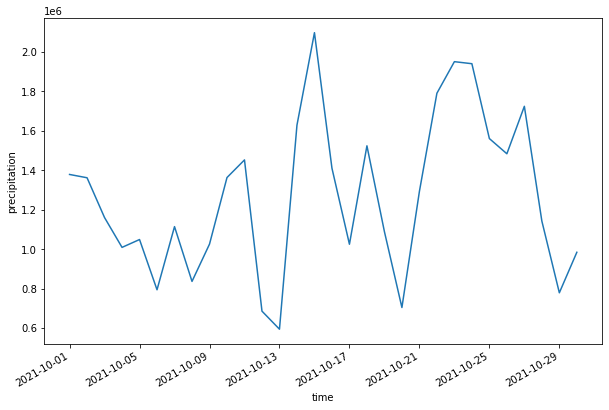

In [7]:
fig, ax = plt.subplots(figsize=(10,6))
da['precipitation'].sum(['x', 'y']).plot(ax=ax)

### Data analysis with `GEE`
**Get mean value over time**

In [8]:
count = chirps.size()
count.getInfo()

304

In [9]:
regReducer = {
    'geometry': aoi,
    'reducer': ee.Reducer.mean(),
    'tileScale': 8,
    'maxPixels': 1e+13,
    'bestEffort': True
}

def func_mean(img):
    reduction = img.reduceRegion(**regReducer)
    properties = reduction.combine(ee.Dictionary({'date': ee.Date(img.toDictionary(['system:time_start']).get('system:time_start')).format("YYYY-MM-dd")}))
    return ee.Feature(None, properties)

In [10]:
%%time
data = ee.FeatureCollection(chirps.map(func_mean)).toList(count).getInfo()

CPU times: user 258 ms, sys: 276 µs, total: 258 ms
Wall time: 11.2 s


In [13]:
df_pre = pd.DataFrame(map(lambda x: x.get('properties'), data))

<AxesSubplot:xlabel='date'>

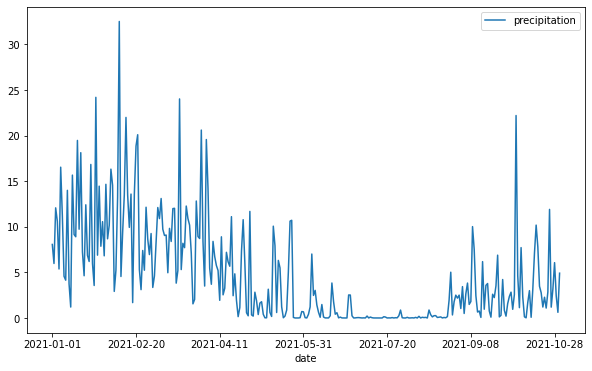

In [14]:
fig, ax = plt.subplots(figsize=(10,6))
df_pre.plot(ax=ax, x='date', y='precipitation')

<AxesSubplot:xlabel='date'>

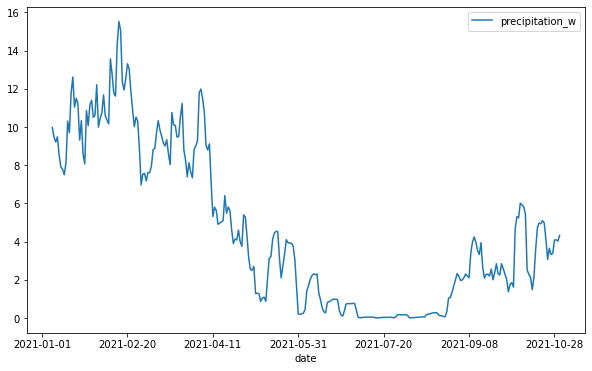

In [15]:
df_pre['precipitation_w'] = df_pre[['date', 'precipitation']].rolling(7).mean()

fig, ax = plt.subplots(figsize=(10,6))
df_pre.plot(ax=ax, x='date', y='precipitation_w')

<AxesSubplot:xlabel='date'>

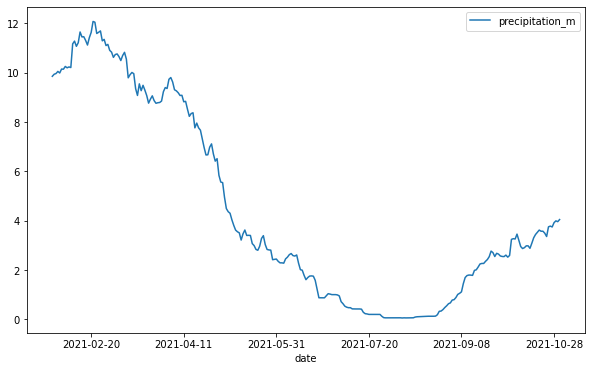

In [16]:
df_pre['precipitation_m'] = df_pre[['date', 'precipitation']].rolling(30).mean()

fig, ax = plt.subplots(figsize=(10,6))
df_pre.plot(ax=ax, x='date', y='precipitation_m')

<AxesSubplot:xlabel='date'>

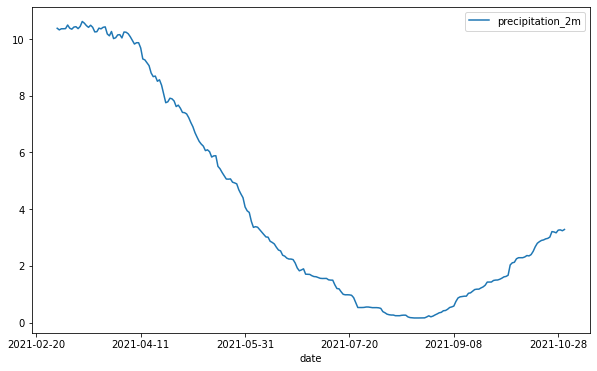

In [70]:
df_pre['precipitation_2m'] = df_pre[['date', 'precipitation']].rolling(61).mean()

fig, ax = plt.subplots(figsize=(10,6))
df_pre.plot(ax=ax, x='date', y='precipitation_2m')

**Parallelize the process**

In [ ]:
# Get last image
image=chirps.limit(1, 'system:time_start', False).first()
image = image.clip(aoi)

In [ ]:
%%time
regReducer = {
    'geometry': ee.Geometry(geometry.get('features')[0].get('geometry')),
    'reducer': ee.Reducer.mean(),
    'tileScale': 8,
    'bestEffort': True
}

image.reduceRegion(**regReducer).get('precipitation').getInfo()

In [ ]:
%%time
regReducer = {
    'collection': clipped_grid,
    'reducer': ee.Reducer.mean(),
    'scale': 5566,
    'tileScale': 8,
}

mean = image.reduceRegions(**regReducer).toList(1).getInfo()[0].get('properties').get('mean')
mean

In [ ]:
clipped_grid.size().getInfo()

In [ ]:
image.reduceRegions(**regReducer).toList(clipped_grid.size()).getInfo()[12].get('properties').get('mean')

##  VIIRS fire alerts

### **Daily alerts**

In [25]:
start_date = '2021-01-01'
end_date = '2021-11-30'
dates = pd.date_range(start_date,end_date,freq='D').astype(str)

### National (iso)

In [26]:
iso = 'BRA'
confidence = 'h' #'n', 'l'

query =(f"SELECT alert__date, SUM(alert__count) AS alert__count \
        FROM data WHERE iso = \'{iso}\' AND confidence__cat = \'{confidence}\' AND alert__date >= \'{start_date}\' AND alert__date <= \'{end_date}\' \
        GROUP BY iso, alert__date, confidence__cat \
        ORDER BY alert__date"
)

url = f"https://data-api.globalforestwatch.org/dataset/gadm__viirs__adm2_daily_alerts/latest/query/json"

sql = {"sql": query}
r = requests.get(url, params=sql)

data = r.json().get('data')
df_fire = pd.DataFrame.from_dict(json_normalize(data))
# Fill missing dates with 0
df_fire = df_fire.set_index('alert__date').reindex(dates, fill_value=0).reset_index().rename(columns={'index': 'alert__date'})
df_fire.head()

/tmp/ipykernel_4323/2647017176.py:16: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_fire = pd.DataFrame.from_dict(json_normalize(data))


,alert__date,alert__count
0,2021-01-01,25
1,2021-01-02,36
2,2021-01-03,43
3,2021-01-04,28
4,2021-01-05,7


<AxesSubplot:xlabel='alert__date'>

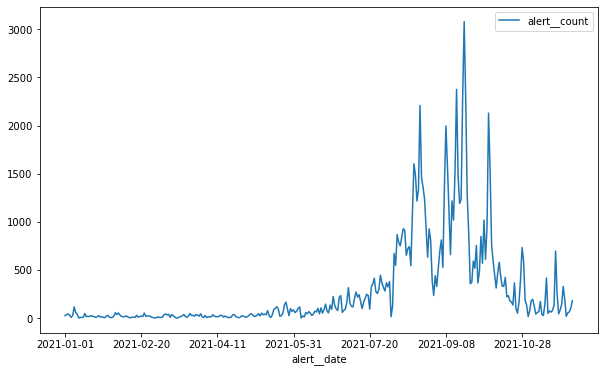

In [27]:
fig, ax = plt.subplots(figsize=(10,6))
df_fire.plot(ax=ax, x='alert__date', y='alert__count')

**1 week moving average**

<AxesSubplot:xlabel='alert__date'>

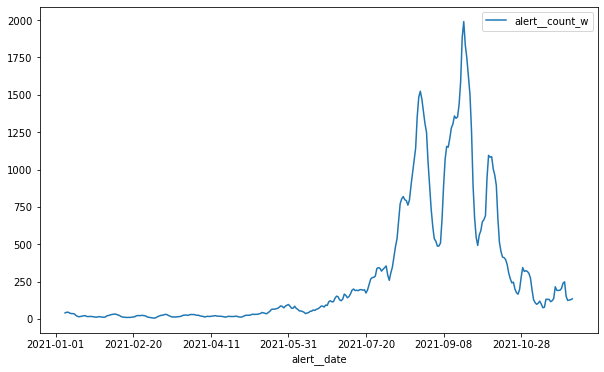

In [28]:
df_fire['alert__count_w'] = df_fire[['alert__date', 'alert__count']].rolling(7).mean()

fig, ax = plt.subplots(figsize=(10,6))
df_fire.plot(ax=ax, x='alert__date', y='alert__count_w')

**1 month moving average**

<AxesSubplot:xlabel='alert__date'>

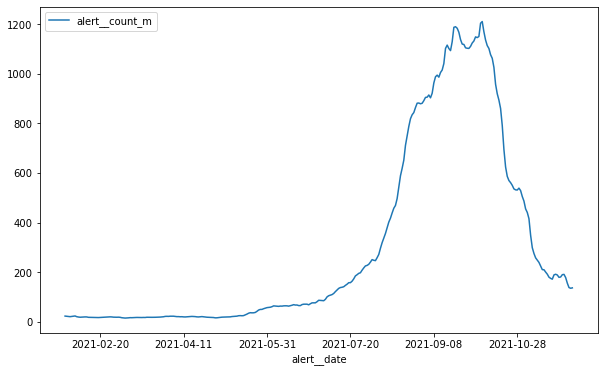

In [29]:
df_fire['alert__count_m'] = df_fire[['alert__date', 'alert__count']].rolling(30).mean()

fig, ax = plt.subplots(figsize=(10,6))
df_fire.plot(ax=ax, x='alert__date', y='alert__count_m')

**Cumulative fire alerts**

<AxesSubplot:xlabel='alert__date'>

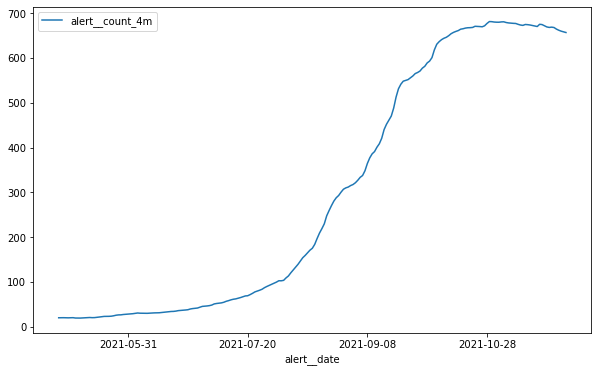

In [30]:
df_fire['alert__count_4m'] = df_fire[['alert__date', 'alert__count']].rolling(122).mean()

fig, ax = plt.subplots(figsize=(10,6))
df_fire.plot(ax=ax, x='alert__date', y='alert__count_4m')

### Regional (admin1)

In [41]:
iso = 'BRA'
adm1 = 22
start_date = '2021-01-01'
end_date = '2021-11-30'
confidence = 'h' #'n', 'l'

query =(f"SELECT alert__date, SUM(alert__count) AS alert__count \
        FROM data WHERE iso = \'{iso}\' AND adm1::integer = {adm1} AND confidence__cat = \'{confidence}\' AND alert__date >= \'{start_date}\' AND alert__date <= \'{end_date}\' \
        GROUP BY iso, adm1, alert__date, confidence__cat \
        ORDER BY alert__date"
)

url = f"https://data-api.globalforestwatch.org/dataset/gadm__viirs__adm2_daily_alerts/latest/query/json"

sql = {"sql": query}
r = requests.get(url, params=sql)

data = r.json().get('data')
df_fire = pd.DataFrame.from_dict(json_normalize(data))
# Fill missing dates with 0
df_fire = df_fire.set_index('alert__date').reindex(dates, fill_value=0).reset_index().rename(columns={'index': 'alert__date'})
df_fire.head()

/tmp/ipykernel_4323/1286860497.py:19: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_fire = pd.DataFrame.from_dict(json_normalize(data))


,alert__date,alert__count
0,2021-01-01,0
1,2021-01-02,0
2,2021-01-03,0
3,2021-01-04,0
4,2021-01-05,0


<AxesSubplot:xlabel='alert__date'>

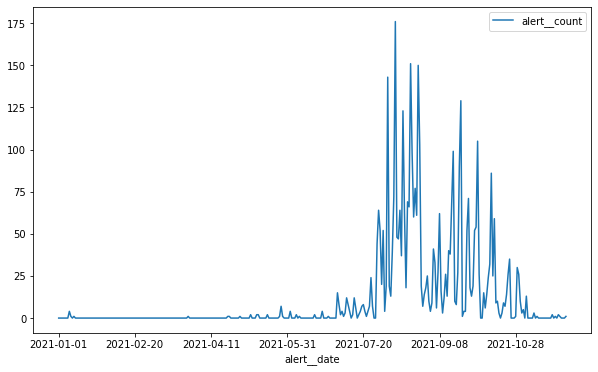

In [42]:
fig, ax = plt.subplots(figsize=(10,6))
df_fire.plot(ax=ax, x='alert__date', y='alert__count')

**1 week moving average**

<AxesSubplot:xlabel='alert__date'>

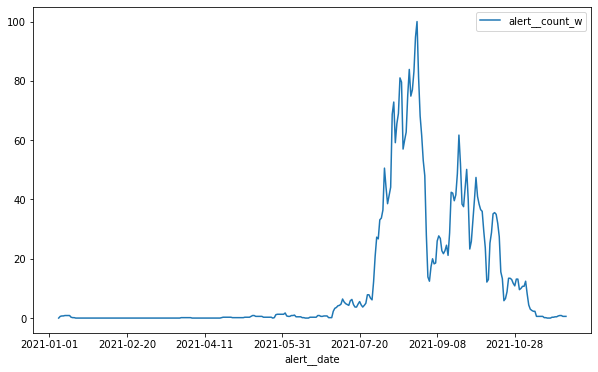

In [43]:
df_fire['alert__count_w'] = df_fire[['alert__date', 'alert__count']].rolling(7).mean()

fig, ax = plt.subplots(figsize=(10,6))
df_fire.plot(ax=ax, x='alert__date', y='alert__count_w')

**1 month moving average**

<AxesSubplot:xlabel='alert__date'>

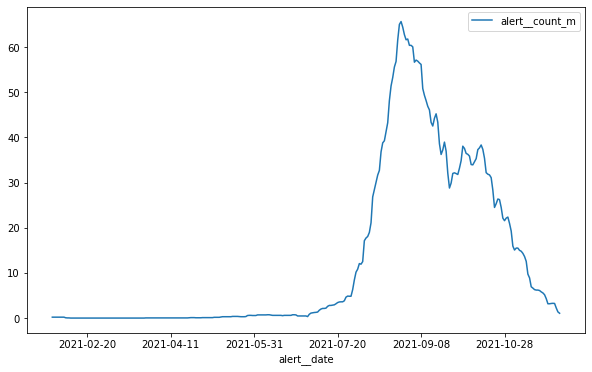

In [44]:
df_fire['alert__count_m'] = df_fire[['alert__date', 'alert__count']].rolling(30).mean()

fig, ax = plt.subplots(figsize=(10,6))
df_fire.plot(ax=ax, x='alert__date', y='alert__count_m')

**2 month moving average**

<AxesSubplot:xlabel='alert__date'>

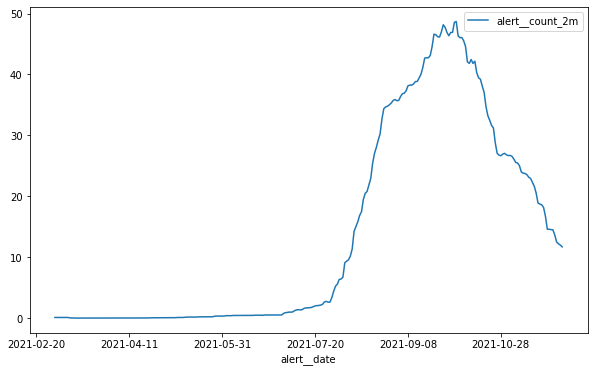

In [76]:
df_fire['alert__count_2m'] = df_fire[['alert__date', 'alert__count']].rolling(61).mean()

fig, ax = plt.subplots(figsize=(10,6))
df_fire.plot(ax=ax, x='alert__date', y='alert__count_2m')

**Cumulative fire alerts**

<AxesSubplot:xlabel='alert__date'>

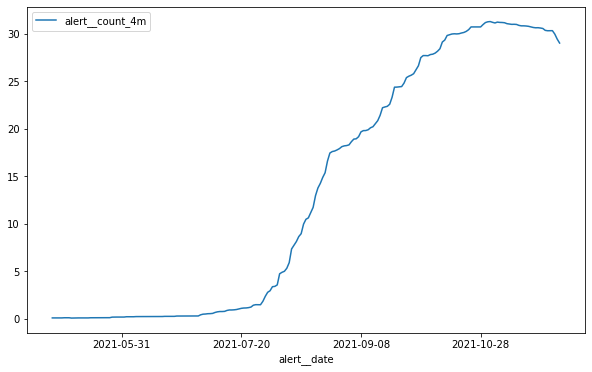

In [45]:
df_fire['alert__count_4m'] = df_fire[['alert__date', 'alert__count']].rolling(122).mean()

fig, ax = plt.subplots(figsize=(10,6))
df_fire.plot(ax=ax, x='alert__date', y='alert__count_4m')

### Regional (admin2)

In [36]:
iso = 'BRA'
adm1 = 22
adm2 = 6
start_date = '2021-01-01'
end_date = '2021-11-30'
confidence = 'h' #'n', 'l'

query =(f"SELECT alert__date, SUM(alert__count) AS alert__count \
        FROM data WHERE iso = \'{iso}\' AND adm1::integer = {adm1} AND adm2::integer = {adm2} AND confidence__cat = \'{confidence}\' AND alert__date >= \'{start_date}\' AND alert__date <= \'{end_date}\' \
        GROUP BY iso, adm1, adm2, alert__date, confidence__cat \
        ORDER BY alert__date"
)

url = f"https://data-api.globalforestwatch.org/dataset/gadm__viirs__adm2_daily_alerts/latest/query/json"

sql = {"sql": query}
r = requests.get(url, params=sql)

data = r.json().get('data')
df_fire = pd.DataFrame.from_dict(json_normalize(data))
# Fill missing dates with 0
df_fire = df_fire.set_index('alert__date').reindex(dates, fill_value=0).reset_index().rename(columns={'index': 'alert__date'})
df_fire.head()

/tmp/ipykernel_4323/1778279106.py:20: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_fire = pd.DataFrame.from_dict(json_normalize(data))


,alert__date,alert__count
0,2021-01-01,0
1,2021-01-02,0
2,2021-01-03,0
3,2021-01-04,0
4,2021-01-05,0


<AxesSubplot:xlabel='alert__date'>

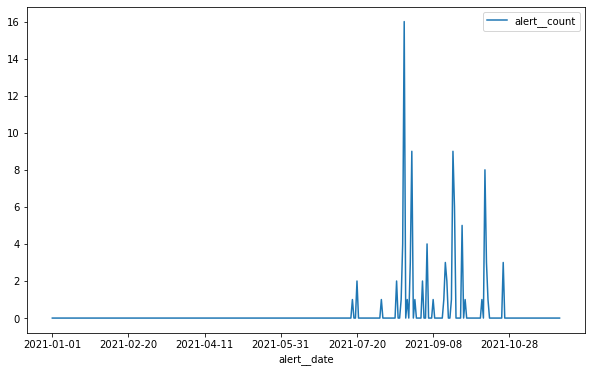

In [37]:
fig, ax = plt.subplots(figsize=(10,6))
df_fire.plot(ax=ax, x='alert__date', y='alert__count')

**1 week moving average**

<AxesSubplot:xlabel='alert__date'>

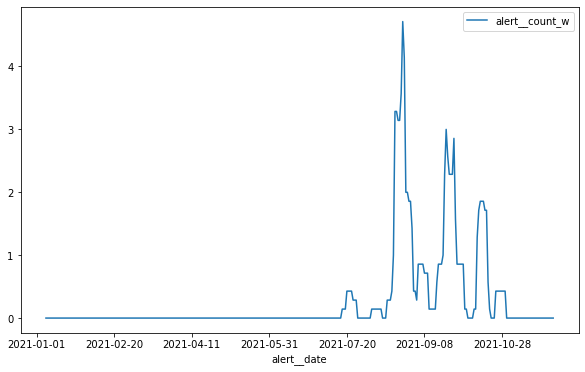

In [38]:
df_fire['alert__count_w'] = df_fire[['alert__date', 'alert__count']].rolling(7).mean()

fig, ax = plt.subplots(figsize=(10,6))
df_fire.plot(ax=ax, x='alert__date', y='alert__count_w')

**1 month moving average**

<AxesSubplot:xlabel='alert__date'>

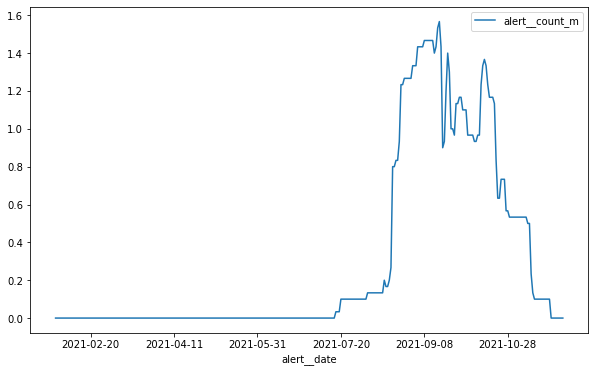

In [39]:
df_fire['alert__count_m'] = df_fire[['alert__date', 'alert__count']].rolling(30).mean()

fig, ax = plt.subplots(figsize=(10,6))
df_fire.plot(ax=ax, x='alert__date', y='alert__count_m')

**Cumulative fire alerts**

<AxesSubplot:xlabel='alert__date'>

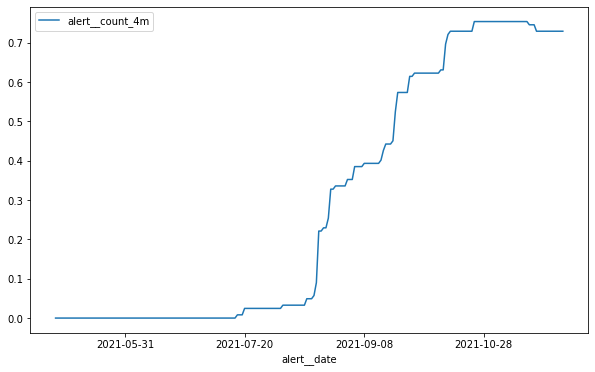

In [40]:
df_fire['alert__count_4m'] = df_fire[['alert__date', 'alert__count']].rolling(122).mean()

fig, ax = plt.subplots(figsize=(10,6))
df_fire.plot(ax=ax, x='alert__date', y='alert__count_4m')

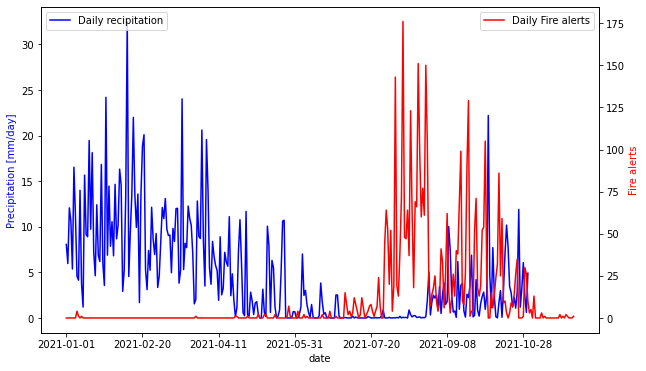

In [85]:
fig, ax = plt.subplots(figsize=(10,6))

ax2 = ax.twinx()
df_pre.plot(ax=ax, x='date', y='precipitation', color='b', label='Daily recipitation', legend=True)
df_fire.plot(ax=ax2, x='alert__date', y='alert__count', color='r', label='Daily Fire alerts', legend=True)

ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax.set_ylabel('Precipitation [mm/day]', color='b')
ax2.set_ylabel('Fire alerts', color='r')

plt.show()

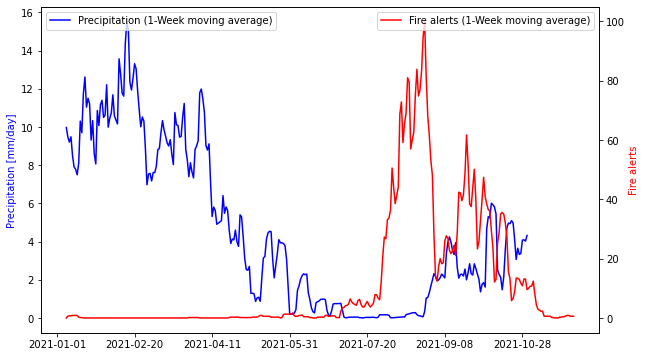

In [81]:
fig, ax = plt.subplots(figsize=(10,6))

ax2 = ax.twinx()
df_pre.plot(ax=ax, x='date', y='precipitation_w', color='b', label='Precipitation (1-Week moving average)', legend=True)
df_fire.plot(ax=ax2, x='alert__date', y='alert__count_w', color='r', label='Fire alerts (1-Week moving average)', legend=True)

ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax.set_ylabel('Precipitation [mm/day]', color='b')
ax2.set_ylabel('Fire alerts', color='r')

plt.show()

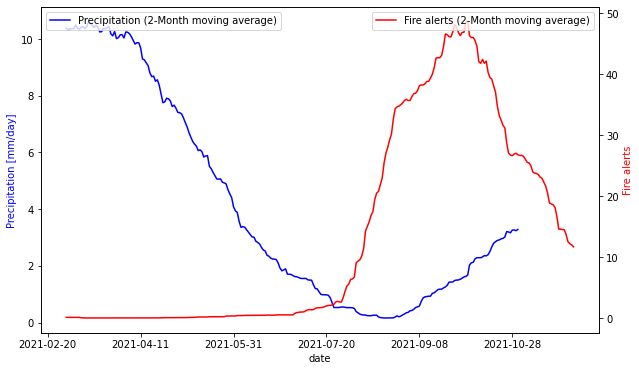

In [84]:
fig, ax = plt.subplots(figsize=(10,6))

ax2 = ax.twinx()
df_pre.plot(ax=ax, x='date', y='precipitation_2m', color='b', label='Precipitation (2-Month moving average)', legend=True)
df_fire.plot(ax=ax2, x='alert__date', y='alert__count_2m', color='r', label='Fire alerts (2-Month moving average)', legend=True)

ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax.set_ylabel('Precipitation [mm/day]', color='b')
ax2.set_ylabel('Fire alerts', color='r')

plt.show()

<AxesSubplot:xlabel='date'>

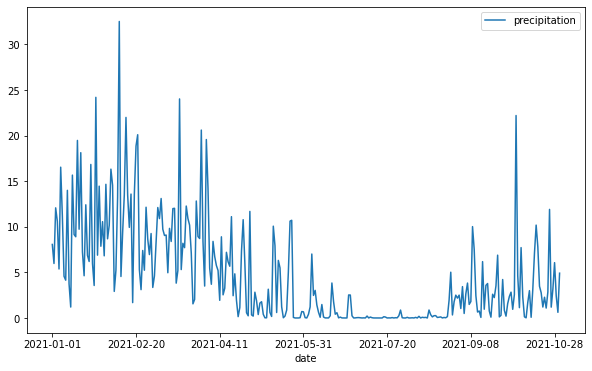

In [46]:
fig, ax = plt.subplots(figsize=(10,6))
df_pre.plot(ax=ax, x='date', y='precipitation')

<AxesSubplot:xlabel='alert__date'>

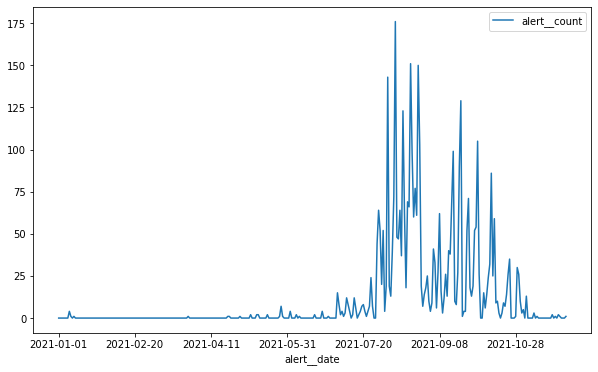

In [48]:
fig, ax = plt.subplots(figsize=(10,6))
df_fire.plot(ax=ax, x='alert__date', y='alert__count')

### Weekly alerts

In [17]:
iso = 'BRA'
year = 2021

query =(f"SELECT iso, alert__year, alert__week, SUM(alert__count) AS alert__count, confidence__cat \
        FROM data WHERE iso = \'{iso}\' AND confidence__cat = 'h' and alert__year = {year}\
        GROUP BY iso, alert__year, alert__week, confidence__cat \
        ORDER BY alert__year, alert__week"
)

url = f"https://data-api.globalforestwatch.org/dataset/gadm__viirs__iso_weekly_alerts/latest/query/json"

sql = {"sql": query}
r = requests.get(url, params=sql)

data = r.json().get('data')
df_fire = pd.DataFrame.from_dict(json_normalize(data))
df_fire.head()

/tmp/ipykernel_4323/702807646.py:16: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_fire = pd.DataFrame.from_dict(json_normalize(data))


,iso,alert__year,alert__week,alert__count,confidence__cat
0,BRA,2021,1,275,h
1,BRA,2021,2,118,h
2,BRA,2021,3,117,h
3,BRA,2021,4,90,h
4,BRA,2021,5,221,h


<AxesSubplot:>

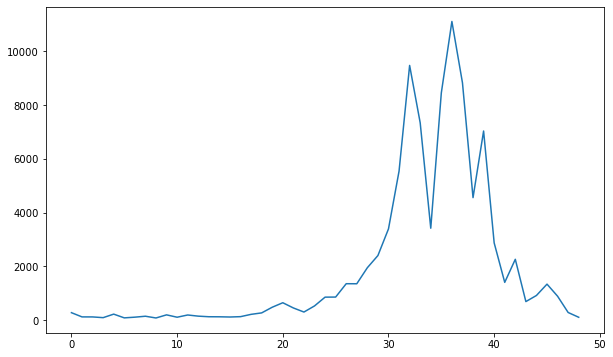

In [18]:
fig, ax = plt.subplots(figsize=(10,6))
df_fire['alert__count'].plot(ax=ax)

In [19]:
iso = 'BRA'
adm1 = 22
year = 2021

query =(f"SELECT iso, adm1::integer, alert__year, alert__week, SUM(alert__count) AS alert__count, confidence__cat \
        FROM data WHERE iso = \'{iso}\' AND adm1::integer = {adm1} AND confidence__cat = 'h' AND alert__year = {year}\
        GROUP BY iso, adm1, alert__year, alert__week, confidence__cat \
        ORDER BY alert__year, alert__week"
)

url = f"https://data-api.globalforestwatch.org/dataset/gadm__viirs__adm1_weekly_alerts/latest/query/json"

sql = {"sql": query}
r = requests.get(url, params=sql)

data = r.json().get('data')
df_fire = pd.DataFrame.from_dict(json_normalize(data))
df_fire.head()

/tmp/ipykernel_4323/4281908988.py:17: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_fire = pd.DataFrame.from_dict(json_normalize(data))


,iso,adm1,alert__year,alert__week,alert__count,confidence__cat
0,BRA,22,2021,1,5,h
1,BRA,22,2021,2,1,h
2,BRA,22,2021,12,1,h
3,BRA,22,2021,16,2,h
4,BRA,22,2021,17,1,h


<AxesSubplot:>

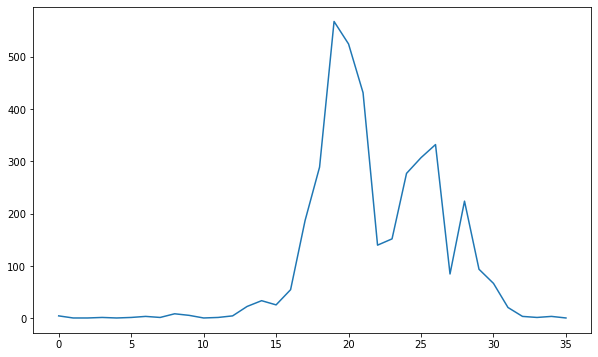

In [21]:
fig, ax = plt.subplots(figsize=(10,6))
df_fire['alert__count'].plot(ax=ax)

In [22]:
iso = 'BRA'
adm1 = 22
adm2 = 6
year = 2021

query =(f"SELECT iso, adm1::integer, adm2::integer, alert__year, alert__week, SUM(alert__count) AS alert__count, confidence__cat \
        FROM data WHERE iso = \'{iso}\' AND adm1::integer = {adm1} AND adm2::integer = {adm2} AND confidence__cat = 'h' AND alert__year = {year}\
        GROUP BY iso, adm1, adm2, alert__year, alert__week, confidence__cat \
        ORDER BY alert__year, alert__week"
)

url = f"https://data-api.globalforestwatch.org/dataset/gadm__viirs__adm2_weekly_alerts/latest/query/json"

sql = {"sql": query}
r = requests.get(url, params=sql)

data = r.json().get('data')
df_fire = pd.DataFrame.from_dict(json_normalize(data))
df_fire.head()

/tmp/ipykernel_4323/362240521.py:18: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_fire = pd.DataFrame.from_dict(json_normalize(data))


,iso,adm1,adm2,alert__year,alert__week,alert__count,confidence__cat
0,BRA,22,6,2021,28,1,h
1,BRA,22,6,2021,29,2,h
2,BRA,22,6,2021,31,1,h
3,BRA,22,6,2021,32,2,h
4,BRA,22,6,2021,33,22,h


<AxesSubplot:>

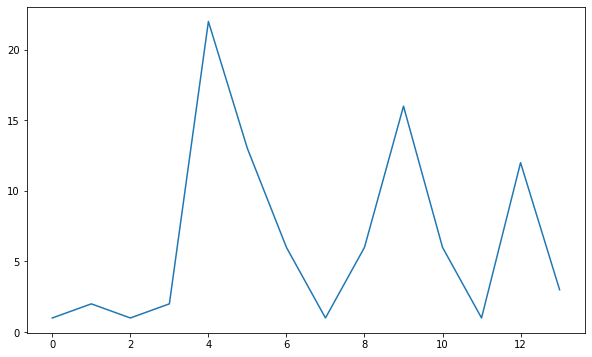

In [23]:
fig, ax = plt.subplots(figsize=(10,6))
df_fire['alert__count'].plot(ax=ax)